<a href="https://colab.research.google.com/github/sjsoumil/Projects/blob/main/spam_detection_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Dense,GlobalMaxPooling1D,LSTM,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv


--2023-10-10 04:26:55--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2023-10-10 04:26:56 (12.5 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
df=pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [ ]:
df.columns=["Label","Data"]

In [ ]:
df.head()

,Label,Data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df["b_label"]=df["Label"].map({"ham":0,"spam":1})
Y=df["b_label"].values

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(df["Data"],Y,test_size=0.33)

In [ ]:

MAX_WORD_VOCAB=20000
tokenizer=Tokenizer(num_words=MAX_WORD_VOCAB)
tokenizer.fit_on_texts(X_train)
sequence_train=tokenizer.texts_to_sequences(X_train)
sequence_test=tokenizer.texts_to_sequences(X_test)

In [ ]:
word2ind=tokenizer.word_index
V=len(word2ind)
print(f"Len of word2ind is : {V} ")

Len of word2ind is : 7292 


In [ ]:
data_train=pad_sequences(sequence_train)
print(f"The shape of training tensor is : {data_train.shape}") # NxT N is number of input T is the time of timesequence
T=data_train.shape[1]

The shape of training tensor is : (3733, 189)


In [ ]:
data_test=pad_sequences(sequence_test,maxlen=T)
print(f"Shape of test tensor is : {data_test.shape}")

Shape of test tensor is : (1839, 189)


In [ ]:
D=20 #embedding dimensionality
M=15 #Hidden state dimensionality

#embedding will be done from (V+1,D) cux 0 is used for padding

i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=LSTM(M,return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1,activation="sigmoid")(x)

model=Model(i,x)


In [ ]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

r=model.fit(data_train,Y_train,
          epochs=10,
          validation_data=(data_test,Y_test))

Epoch 1/10
117/117 [==============================] - 33s 203ms/step - loss: 0.0131 - accuracy: 0.9995 - val_loss: 0.0480 - val_accuracy: 0.9859
Epoch 2/10
117/117 [==============================] - 13s 105ms/step - loss: 0.0084 - accuracy: 0.9995 - val_loss: 0.0404 - val_accuracy: 0.9918
Epoch 3/10
117/117 [==============================] - 5s 44ms/step - loss: 0.0061 - accuracy: 0.9995 - val_loss: 0.0399 - val_accuracy: 0.9924
Epoch 4/10
117/117 [==============================] - 5s 45ms/step - loss: 0.0046 - accuracy: 0.9995 - val_loss: 0.0412 - val_accuracy: 0.9918
Epoch 5/10
117/117 [==============================] - 5s 46ms/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 0.0427 - val_accuracy: 0.9913
Epoch 6/10
117/117 [==============================] - 3s 22ms/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 0.0434 - val_accuracy: 0.9908
Epoch 7/10
117/117 [==============================] - 2s 17ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0433 - val_accuracy: 0.

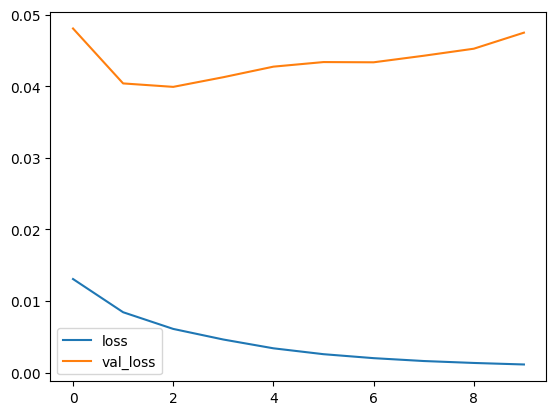

In [ ]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

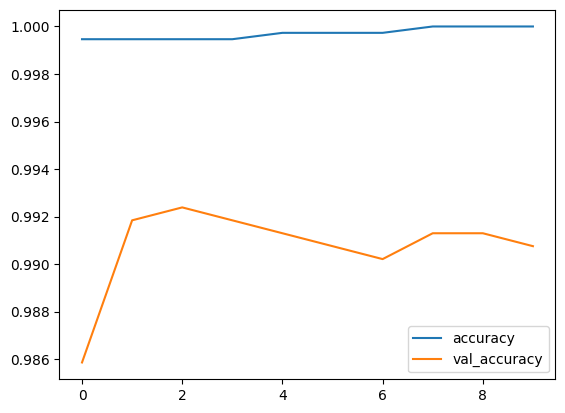

In [ ]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()